# Ionosphere Dataset

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier as RC, LogisticRegression as LR
from sklearn.ensemble import RandomForestClassifier as RFC, GradientBoostingClassifier as GBC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier as DTC

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

Importing Dataset

In [2]:
names = ('a01', 'a02', 'a03', 'a04', 'a05', 'a06', 'a07', 'a08', 'a09', 'a10',
         'a11', 'a12', 'a13', 'a14', 'a15', 'a16', 'a17', 'a18', 'a19', 'a20',
         'a21', 'a22', 'a23', 'a24', 'a25', 'a26', 'a27', 'a28', 'a29', 'a30',
         'a31', 'a32', 'a33', 'a34', 'class1')

In [3]:
df = pd.read_csv('ionosphere.csv', names = names)

Exploratory Data Analysis

In [4]:
df.head()

,a01,a02,a03,a04,a05,a06,a07,a08,a09,a10,...,a26,a27,a28,a29,a30,a31,a32,a33,a34,class1
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [5]:
df.isnull().sum()

a01       0
a02       0
a03       0
a04       0
a05       0
a06       0
a07       0
a08       0
a09       0
a10       0
a11       0
a12       0
a13       0
a14       0
a15       0
a16       0
a17       0
a18       0
a19       0
a20       0
a21       0
a22       0
a23       0
a24       0
a25       0
a26       0
a27       0
a28       0
a29       0
a30       0
a31       0
a32       0
a33       0
a34       0
class1    0
dtype: int64

In [6]:
df.describe()

,a01,a02,a03,a04,a05,a06,a07,a08,a09,a10,...,a25,a26,a27,a28,a29,a30,a31,a32,a33,a34
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,...,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,...,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,...,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,...,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,...,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

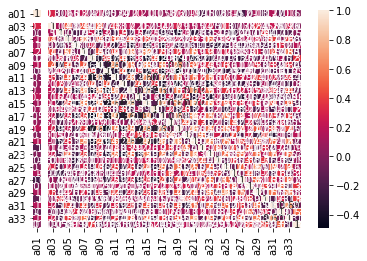

In [7]:
# plt.figsize(10, 9)
sns.heatmap(df.corr(), annot = True)

In [8]:
from sklearn.preprocessing import LabelEncoder

Label = LabelEncoder()
Label.fit(df.class1.drop_duplicates())
df.class1 = Label.transform(df.class1)


Text(0.5, 1.0, 'A03 and Class')

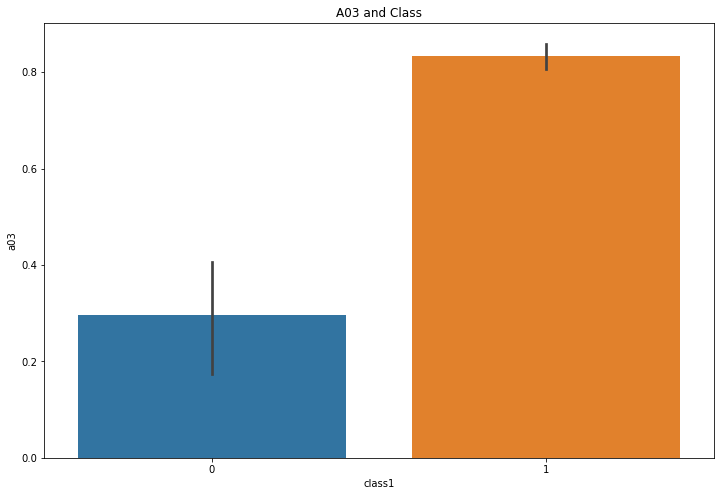

In [9]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'class1', y = 'a03', data = df)
plt.title('A03 and Class')

Classification

In [10]:
y = df.class1
x = df.drop('class1', axis =  1)

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 176)

In [11]:
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(263, 34) (88, 34) (263,) (88,)


In [12]:
models = {'Ridge' : make_pipeline(StandardScaler(), RC(random_state=123)),
    'RandomForest' : make_pipeline(StandardScaler(), RFC(random_state=123)),
    'LogisticRegression' : make_pipeline(StandardScaler(), LR(random_state=123)),
    'DecisionTreeClassifier' : make_pipeline(StandardScaler(), DTC(random_state=123)),
    'GradientBoosting' : make_pipeline(StandardScaler(), GBC(random_state=123))}


In [13]:
models

{'Ridge': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier(random_state=123))]),
 'RandomForest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(random_state=123))]),
 'LogisticRegression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression(random_state=123))]),
 'DecisionTreeClassifier': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('decisiontreeclassifier',
                  DecisionTreeClassifier(random_state=123))]),
 'GradientBoosting': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier',
                  GradientBoostingClassifier(random_state=123))])}

In [14]:
models_fit = {}
for name, model in models.items():
    model.fit(xtrain, ytrain)
    models_fit[name] = model
    print(f'{name}')

Ridge
RandomForest
LogisticRegression
DecisionTreeClassifier
GradientBoosting


In [15]:
models_fit

{'Ridge': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier(random_state=123))]),
 'RandomForest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(random_state=123))]),
 'LogisticRegression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression(random_state=123))]),
 'DecisionTreeClassifier': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('decisiontreeclassifier',
                  DecisionTreeClassifier(random_state=123))]),
 'GradientBoosting': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier',
                  GradientBoostingClassifier(random_state=123))])}

In [16]:
res1 = []
names = []
for name, model in models_fit.items():
    ypred = model.predict(xtest)
    names.append(name)
    r1 = accuracy_score(ytest, ypred)
    res1 = np.append(res1, r1)
    output = "%s|Accuracy = %f" %(name, r1)
    print(output)


Ridge|Accuracy = 0.818182
RandomForest|Accuracy = 0.886364
LogisticRegression|Accuracy = 0.863636
DecisionTreeClassifier|Accuracy = 0.829545
GradientBoosting|Accuracy = 0.909091


([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

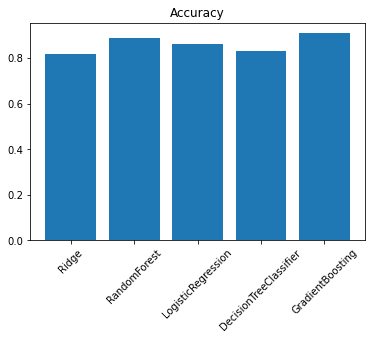

In [17]:
plt.bar(names, res1)
plt.title('Accuracy')
plt.xticks(rotation = 45)

array([0.81818182, 0.88636364, 0.86363636, 0.82954545, 0.90909091])

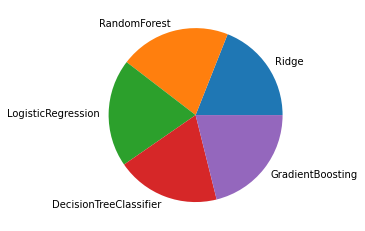

In [18]:
res1 = np.array(abs(res1))
plt.pie(res1, labels = names)
res1

HyperParameter Tuning

In [19]:
model = make_pipeline(StandardScaler(), RC(alpha=1.0, fit_intercept=True, normalize='deprecated',
                                        copy_X=True, max_iter=None, tol=0.001, class_weight=None, solver='auto',
                                        random_state=None))

model.fit(xtrain, ytrain)

ypred = model.predict(xtest)
print(f'{accuracy_score(ytest, ypred)}')

0.8295454545454546


More Model(s) With Randomized Search

In [20]:
from sklearn.model_selection import RandomizedSearchCV as RS

In [21]:
RC_hyperparameters = {
    'alpha' : [0, 0.25, 0.5, 0.75, 1],
    'normalize' : [True, False], 
    'max_iter' : [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'],
    'tol' : [0.001, 0.0001, 0.00001]
}

In [22]:
model1 = RC()
model1 = RS(model1, RC_hyperparameters, n_iter=50)
model1.fit(xtrain, ytrain)
model1.best_params_
ypred1 = model1.predict(xtest)
print(f'{accuracy_score(ytest, ypred1)}')

C:\Users\khade\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\khade\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\khade\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 945, in fit
    super().fit(X, Y, sample_weight=sample_weight)
  File "C:\Users\khade\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "C:\Users\khade\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'saga'. Go

C:\Users\khade\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\khade\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\khade\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 945, in fit
    super().fit(X, Y, sample_weight=sample_weight)
  File "C:\Users\khade\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "C:\Users\khade\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'saga'. Go

C:\Users\khade\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\khade\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\khade\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 945, in fit
    super().fit(X, Y, sample_weight=sample_weight)
  File "C:\Users\khade\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 593, in fit
    self.coef_, self.n_iter_ = _ridge_regression(
  File "C:\Users\khade\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 397, in _ridge_regression
    raise ValueError("Known solvers are 'sparse_cg', 'cholesky', 'svd'"
ValueError: Known solvers are 'sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag' or 'saga'. Go

0.8295454545454546


C:\Users\khade\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.85551524 0.85936139 0.85551524 0.87068215 0.86683599 0.85936139
 0.87068215 0.87068215        nan 0.85936139 0.87068215 0.85551524
 0.87068215 0.85936139 0.85936139 0.85936139        nan 0.85936139
        nan 0.86683599 0.86683599 0.85936139 0.85936139        nan
 0.86683599 0.85558781 0.85936139 0.85936139 0.85936139 0.85936139
 0.85558781 0.85936139 0.87068215        nan        nan 0.85936139
 0.85551524 0.85936139 0.85936139 0.85558781        nan 0.85936139
 0.87068215 0.85936139 0.86683599 0.85936139 0.85558781 0.86690856
 0.87068215 0.85551524]
  warnings.warn(


In [23]:
model1.best_params_
print(model1.best_params_)

{'tol': 0.001, 'solver': 'sparse_cg', 'normalize': True, 'max_iter': 600, 'alpha': 0.75}


In [24]:
from sklearn.neighbors import KNeighborsClassifier as KN
model3 = KN(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30)
model3.fit(xtrain, ytrain)
ypred = model3.predict(xtest)
print(f'{accuracy_score(ytest, ypred)}')


0.7954545454545454


In [25]:
KN_hyperparameters = {
    'n_neighbors' : [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'weights' : ['uniform', 'distance'], 
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
}

In [26]:
model4 = KN()
model4 = RS(model4, KN_hyperparameters, n_iter=50)
model4.fit(xtrain, ytrain)
model4.best_params_
ypred4 = model4.predict(xtest)
print(f'{accuracy_score(ytest, ypred4)}')

0.8295454545454546


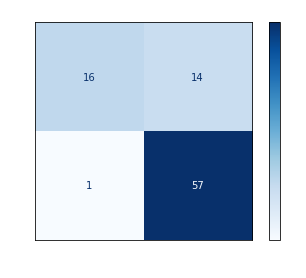

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
 
color = 'white'
matrix = plot_confusion_matrix(model4, xtest, ytest, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()


In [28]:
from sklearn.metrics import classification_report
 
print(classification_report(ytest, ypred4))
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, ypred4)
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypred4)
# Recall
from sklearn.metrics import recall_score
recall_score(ytest, ypred4, average=None)
# Precision
from sklearn.metrics import precision_score
precision_score(ytest, ypred4, average=None)


              precision    recall  f1-score   support

           0       0.94      0.53      0.68        30
           1       0.80      0.98      0.88        58

    accuracy                           0.83        88
   macro avg       0.87      0.76      0.78        88
weighted avg       0.85      0.83      0.81        88



array([0.94117647, 0.8028169 ])

In [29]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, ypred4)
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypred4)
# Recall
from sklearn.metrics import recall_score
recall_score(ytest, ypred4, average=None)
# Precision
from sklearn.metrics import precision_score
precision_score(ytest, ypred4, average=None)


array([0.94117647, 0.8028169 ])

In [30]:
# Method 1: sklearn
from sklearn.metrics import f1_score
import math
# Method 2: Manual Calculation
tp = 56
tn = 19
fp = 11
fn = 2
precision = tp / (tp + fp)
recall = tp / (tp + fn)
specificity = tn / (tn + fp)
NPV = tn / (tn + fn)
accuracy = (tp + tn) / (tp + tn + fp + fn)
F1 = 2 * (precision * recall) / (precision + recall)
balanced_accuracy = (recall + specificity) / 2
MCC = ((tp * tn) - (fp * fn)) / math.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

In [31]:
def get_confusion_matrix_values(ytest, ypred4):
    cm = confusion_matrix(ytest, ypred4)
    return(cm[0][0], cm[0][1], cm[1][0], cm[1][1])

tp, fp, fn, tn = get_confusion_matrix_values(ytest, ypred4)



In [34]:
precision = tp / (tp + fp)
recall = tp / (tp + fn)
specificity = tn / (tn + fp)
NPV = tn / (tn + fn)
accuracy = (tp + tn) / (tp + tn + fp + fn)
F1 = 2 * (precision * recall) / (precision + recall)
ba= (recall + specificity) / 2
MCC = ((tp * tn) - (fp * fn)) / math.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

In [35]:
print(precision)
print(recall)
print(specificity)
print(NPV)
print(accuracy)
print(F1)
print(ba)
print(MCC)

0.5333333333333333
0.9411764705882353
0.8028169014084507
0.9827586206896551
0.8295454545454546
0.6808510638297872
0.871996685998343
0.6196523163306354
